In [24]:
from funciones import *
import pandas as pd
import numpy as np
import pycountry as pc
import math

pd.options.plotting.backend = "plotly"
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.animation import FuncAnimation


In [25]:
fod = pd.read_csv('../data/Food/food_clean.csv')
soy = pd.read_csv('..\data\Soy\soy_clean.csv', parse_dates=['Year'])
oil_prod = pd.read_csv('../data/Palm/oil_prod_clean.csv')
oil_yield = pd.read_csv('../data/Palm/oil_yield_clean.csv')
pop = pd.read_csv('../data/Population/population_clean.csv')

In [3]:
# Agrupar los datos filtrados por año y sumar el Feed para cada año y país
agregado = df_top_countries.groupby(['Year', 'Entity'])['Feed'].sum().unstack()

# Crear subplots con una sola fila y una columna
fig = make_subplots(rows=1, cols=1)

# Añadir las barras apiladas al subplot
for pais in agregado.columns:
    fig.add_trace(go.Bar(x=agregado.index, y=agregado[pais], name=pais), 1, 1)

# Establecer el título y las etiquetas de los ejes
fig.update_layout(title='Total de Feed por año para los 10 países con más número en Feed',
                  xaxis_title='Año',
                  yaxis_title='Total de Feed')

# Mostrar el gráfico
fig.show()

NameError: name 'df_top_countries' is not defined

In [4]:
agregado = soy.groupby(['Year', 'Entity'])['Feed'].sum().unstack()

top_continents = soy.groupby('Entity')['Feed'].sum().nlargest(5).index

# Filtrar los datos para incluir solo los continentes seleccionados
df_top_continents = soy[soy['Entity'].isin(top_continents)]

# Agrupar los datos filtrados por 'Year' y 'Entity' y sumar el 'Feed'
agregado = df_top_continents.groupby(['Year', 'Entity'])['Feed'].sum().unstack()

# Crear subplots con una sola fila y una columna
fig = make_subplots(rows=1, cols=1)

# Añadir las barras apiladas al subplot
for continente in agregado.columns:
    fig.add_trace(go.Bar(x=agregado.index, y=agregado[continente], name=continente), 1, 1)

# Establecer el título y las etiquetas de los ejes
fig.update_layout(title='Total de Feed por año para los cinco continentes',
                  xaxis_title='Año',
                  yaxis_title='Total de Feed')

# Mostrar el gráfico
fig.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


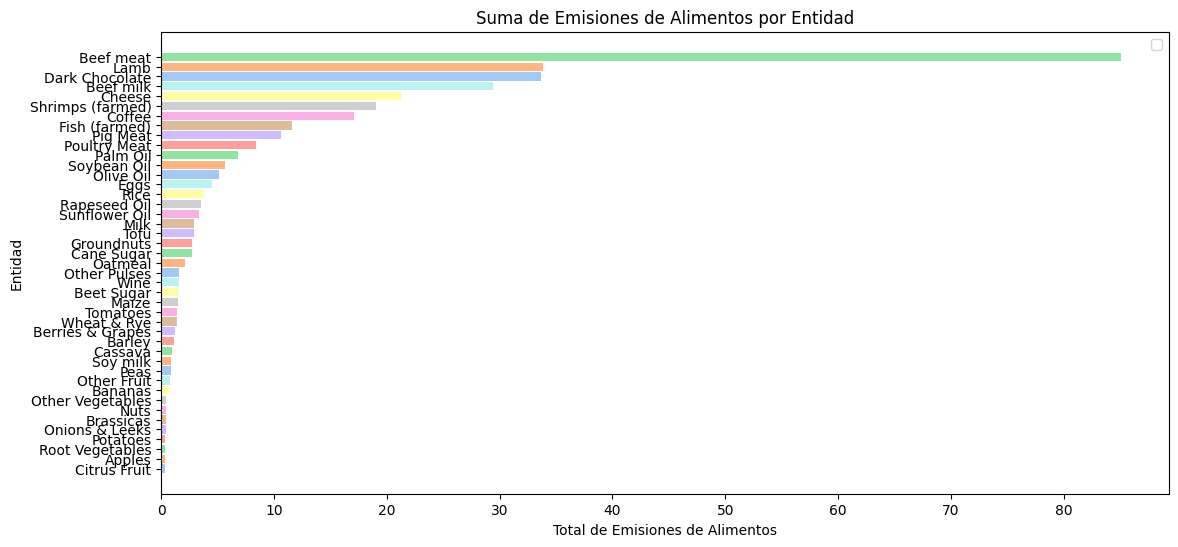

In [5]:
# Calcular la suma de las emisiones de alimentos para cada entidad
fod['Total_Food_Emissions'] = fod.iloc[:, 2:9].sum(axis=1)

df_sorted = fod.sort_values('Total_Food_Emissions', ascending=True)

colors = sns.color_palette('pastel')

# Crear el gráfico de barras horizontales
plt.figure(figsize=(13, 6))
plt.barh(df_sorted['Entity'], df_sorted['Total_Food_Emissions'], color=colors, height=0.85)
plt.xlabel('Total de Emisiones de Alimentos')
plt.ylabel('Entidad')
plt.title('Suma de Emisiones de Alimentos por Entidad')

plt.legend(loc='upper right', labelspacing=2, prop={'size': 10})

plt.rcParams['font.family'] = 'Georgia'

plt.show()

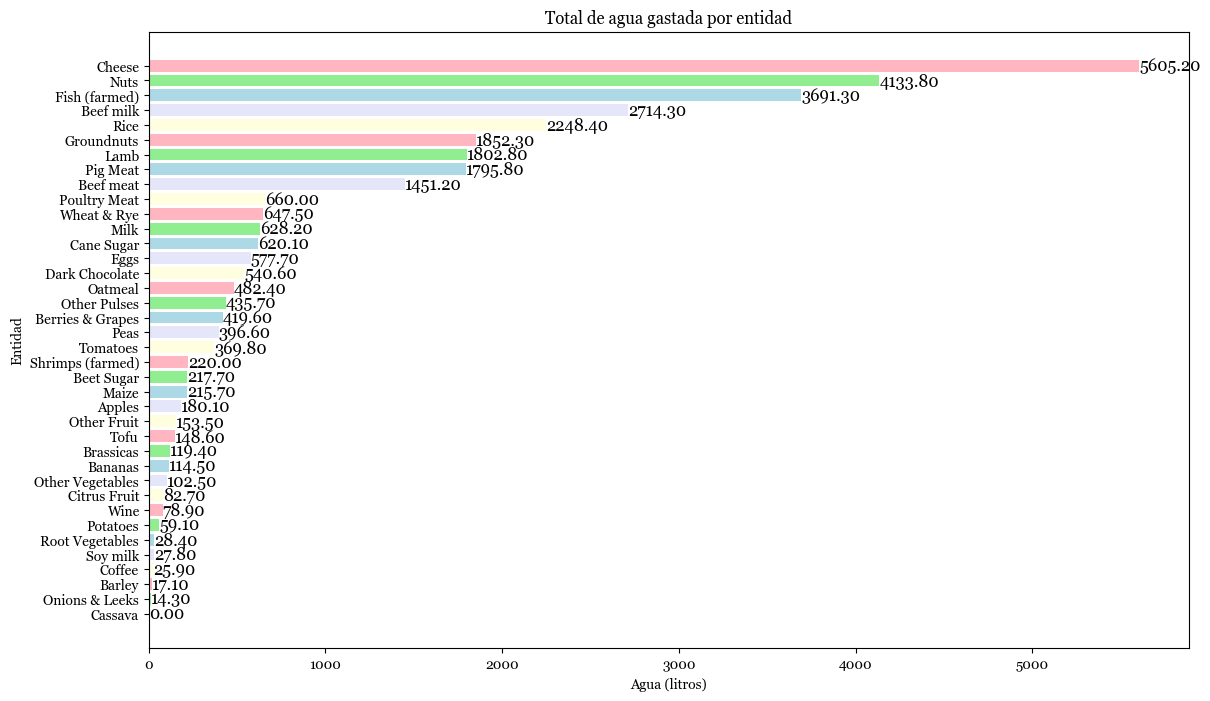

In [6]:
# Crear el gráfico de barras horizontales

df_cleaned = fod.dropna(subset=['Water_l_kg'])

df_sorted = df_cleaned.sort_values('Water_l_kg', ascending=True)

colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow', 'lavender']

plt.figure(figsize=(16, 8))
bars = plt.barh(df_sorted['Entity'], df_sorted['Water_l_kg'], color=colors)
# Añadir etiquetas a las barras
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, '{:.2f}'.format(width),
             ha='left', va='center', color='black', fontsize=12)

# Añadir título y etiquetas de los ejes
plt.title('Total de agua gastada por entidad')
plt.xlabel('Agua (litros)')
plt.ylabel('Entidad')

# Ajustar el espaciado de las etiquetas en el eje y
plt.subplots_adjust(left=0.25)

# Mostrar el gráfico
plt.show()

In [7]:
# Eliminar filas con valores nulos en la columna 'Water_l_kg'
df_cleaned = fod.dropna(subset=['Water_l_kg'])

# Ordenar los datos de mayor a menor
df_sorted = df_cleaned.sort_values('Water_l_kg', ascending=True)

# Crear una paleta de colores pastel
colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow', 'lavender']

# Crear el gráfico de barras horizontales utilizando Plotly
fig = px.bar(df_sorted, x='Water_l_kg', y='Entity', orientation='h', color='Entity', color_discrete_sequence=colors)

# Añadir etiquetas a las barras
fig.update_traces(texttemplate='%{x:.2f}', textposition='outside')

# Añadir título y etiquetas de los ejes
fig.update_layout(title='Total de agua gastada por entidad (Ordenado de mayor a menor)', xaxis_title='Agua (litros)', yaxis_title='Entidad')

# Ajustar el espaciado de las etiquetas en el eje y
fig.update_layout(yaxis=dict(autorange="reversed", automargin=True))

# Mostrar el gráfico
fig.show()


In [15]:
# Gráfico de todas las food
fod['Total_Food_Emissions'] = fod.iloc[:, 2:9].sum(axis=1)

df_sorted = fod.sort_values('Total_Food_Emissions', ascending=True)

# Gráfico de barras horizontales
colors = sns.color_palette('pastel')

# Crea una lista de barras utilizando go.Bar para cada entidad
data = []
for i in range(len(df_sorted)):
    bar = go.Bar(
        x=[df_sorted['Total_Food_Emissions'].iloc[i]],
        y=[df_sorted['Entity'].iloc[i]],
        orientation='h',
        marker=dict(color=colors[i])
    )
    data.append(bar)


fig.update_layout(
    title='Global CO emisions by food',
    xaxis_title='Total emisions',
    yaxis_title='Food',
    legend=dict(x=1.02, y=1),
    height=500,
    width=800
)

# Etiqueta interactiva para seleccionar los elementos del eje Y
fig.update_yaxes(
    type='category',
    categoryorder='array',
    categoryarray=df_sorted['Entity']
)

fig.show()

In [79]:
import plotly.graph_objects as go

# Gráfico de todas las food
# Cálculo de las emisiones totales de comida
fod['Total_Food_Emissions'] = fod.iloc[:, 2:9].sum(axis=1)

# Ordenar el DataFrame por las emisiones totales
df_sorted = fod.sort_values('Total_Food_Emissions', ascending=True)

# Lista de colores
n_colors = 43  # Número deseado de colores
# palette = sns.color_palette("bright", n_colors)
palette = ["#FF5722", "#AED581", "#D0ECE7", "#9CCC65", "#C5E1A5", "#FFAB91", "#FFE0B2",  
           "#DCEDC8", "#FF8A65", "#FFCCBC", "#7CB342", "#DCE775", "#FF7043", "#FFAB40", 
           "#689F38", "#D4E157", "#FF5722", "#558B2F", "#CDDC39", "#E64A19", "#8BC34A",
           "#FF6E40", "#33691E", "#AFB42B", "#BF360C", "#FF3D00", "#827717", "#C0CA33", 
           "#FFAB00", "#827717", "#AFB42B", "#BF360C", "#FF3D00", "#827717", "#C0CA33", 
           "#FFAB00", "#795548", "#A1887F", "#3E2723", "#795548", "#A1887F", "#3E2723", "#3E2723"]


# Crear la figura
fig = go.Figure()

# Crear una lista de barras utilizando go.Bar para cada entidad
data = []
for i, row in df_sorted.iterrows():
    entity = row['Entity']
    bar = go.Bar(
        x=[row['Total_Food_Emissions']],
        y=[entity],
        orientation='h',
        visible=True,
        marker=dict(color=palette[i]),
        name=entity  # Asignar el nombre de la entidad a la barra
    )
    fig.add_trace(bar)
    



# Configuración del diseño del gráfico
fig.update_layout(
    title='Global CO emissions by food',
    xaxis=dict(
        title='Total emissions',
        title_font=dict(color='#59412f')),
    yaxis=dict(
        title='Food',
        title_font=dict(color='#59412f')),
    legend=dict(x=1.02, y=1,
                title_font=dict(color='#59412f'),
                font=dict(color='#59412f')),
    height=500,
    width=800,
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[{"visible": [True if x else False for x in df_sorted['Animal_origin']]}],
                    label="Animal Origin",
                    method="update"
                ),
                dict(
                    args=[{"visible": [True if not x else False for x in df_sorted['Animal_origin']]}],
                    label="Vegetable Origin",
                    method="update"
                ),
                dict(
                    args=[{"visible": [True] * len(df_sorted)}],
                    label="All Entities",
                    method="update"
                )
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.7,
            xanchor="left",
            y=1.2,
            yanchor="top",
            bgcolor="#6a863b",
            active=2,
            font=dict(color='#F5F5DC')
        
        ),
    ]
)

# Ordenar las barras en el eje Y
fig.update_yaxes(
    tickfont=dict(color='#6C584C'),
    type='category',
    categoryorder='array',
    categoryarray=df_sorted['Entity']
)

# Exe x
fig.update_xaxes(
    tickfont=dict(color='#7E675E')
)

fig.show()


In [60]:
len(palette)

42

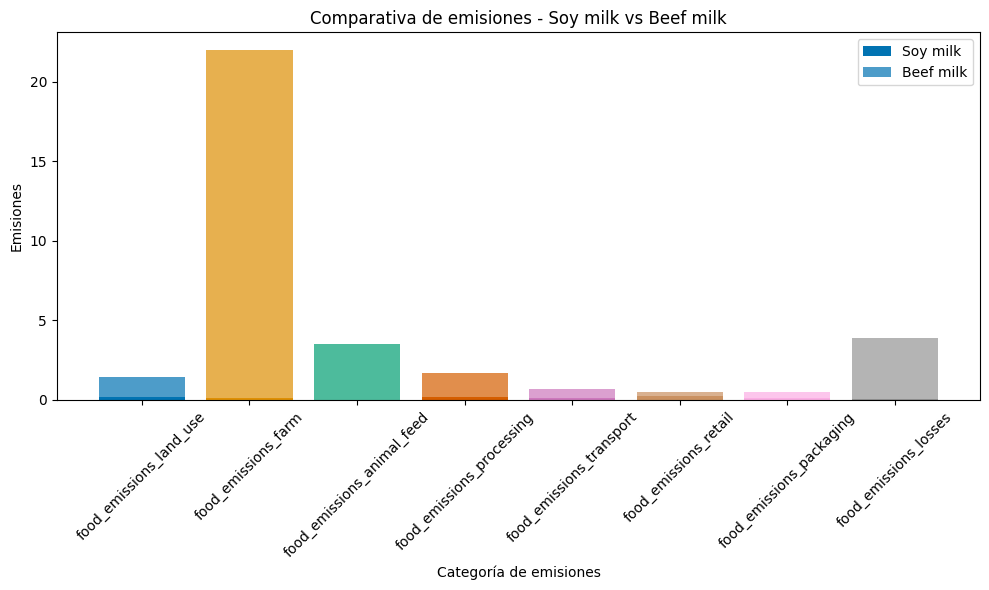

In [74]:
# Filtrar el DataFrame para las entidades 'Soy milk' y 'Beef milk'
filtered_df = fod[fod['Entity'].isin(['Soy milk', 'Beef milk', 'Milk'])]

# Obtener las columnas de emisiones
emissions_columns = ['food_emissions_land_use', 'food_emissions_farm', 'food_emissions_animal_feed',
                     'food_emissions_processing', 'food_emissions_transport', 'food_emissions_retail',
                     'food_emissions_packaging', 'food_emissions_losses']

# Sumar las emisiones para cada entidad
emissions_soy_milk = filtered_df[filtered_df['Entity'] == 'Soy milk'][emissions_columns].mean().values.tolist()
emissions_beef_milk = filtered_df[filtered_df['Entity'] == 'Beef milk'][emissions_columns].mean().values.tolist()
emissions_milk = filtered_df[filtered_df['Entity'] == 'Milk'][emissions_columns].sum().values.tolist()


# Definir las etiquetas para el gráfico
plt.figure(figsize=(10, 6))
plt.bar(range(len(emissions_columns)), emissions_soy_milk, label='Soy milk', color=colors)
plt.bar(range(len(emissions_columns)), emissions_beef_milk, bottom=emissions_soy_milk, label='Beef milk', color=colors, alpha=0.7)
plt.xticks(range(len(emissions_columns)), labels=emissions_columns, rotation=45)
plt.xlabel('Categoría de emisiones')
plt.ylabel('Emisiones')
plt.title('Comparativa de emisiones - Soy milk vs Beef milk')
plt.legend()
plt.tight_layout()
plt.show()


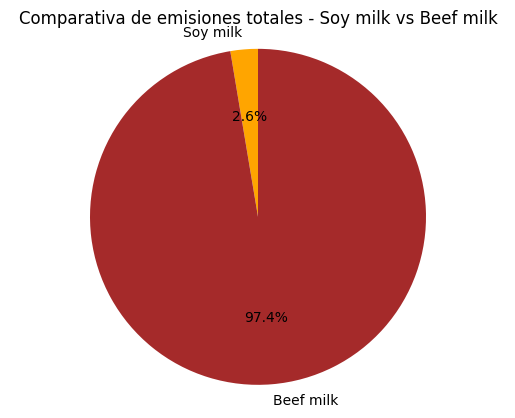

In [75]:
# Obtener las emisiones totales para cada entidad
emissions_soy_milk_total = filtered_df[filtered_df['Entity'] == 'Soy milk']['Total_Food_Emissions'].values[0]
emissions_beef_milk_total = filtered_df[filtered_df['Entity'] == 'Beef milk']['Total_Food_Emissions'].values[0]

# Crear el gráfico de donut
labels = ['Soy milk', 'Beef milk']
sizes = [emissions_soy_milk_total, emissions_beef_milk_total]
colors = ['#FFA500', '#A52A2A']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Comparativa de emisiones totales - Soy milk vs Beef milk')
plt.show()


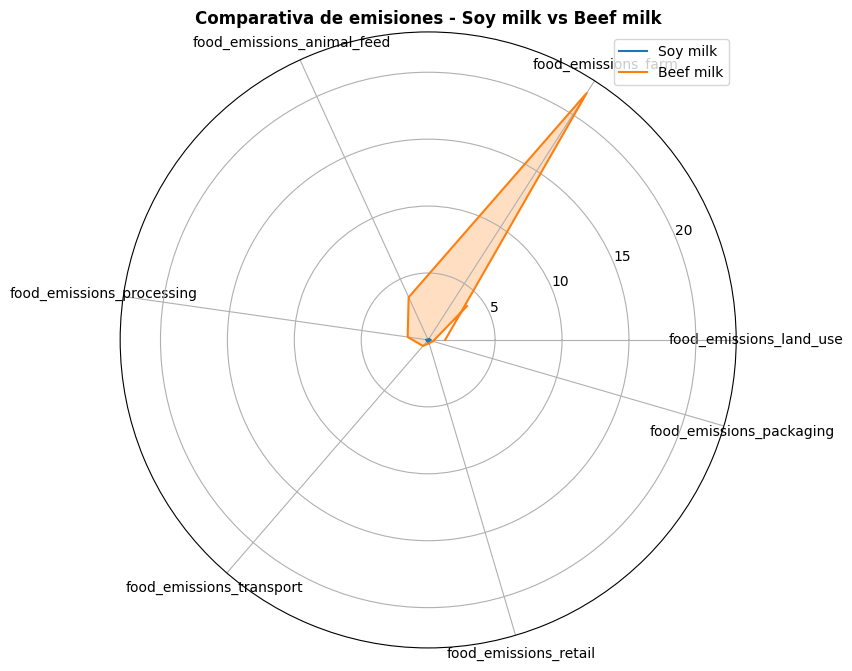

In [76]:
# Configurar los valores para el gráfico de radar
categories = emissions_columns
values_soy_milk = emissions_soy_milk
values_beef_milk = emissions_beef_milk

# Crear el gráfico de radar
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(categories, values_soy_milk, label='Soy milk')
plt.fill(categories, values_soy_milk, alpha=0.25)
plt.plot(categories, values_beef_milk, label='Beef milk')
plt.fill(categories, values_beef_milk, alpha=0.25)
plt.title('Comparativa de emisiones - Soy milk vs Beef milk', size=12, weight='bold')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [81]:
# Filtrar los datos para años desde 2000
df = soy[soy['Year'].dt.year >= 2000]

# Sumar "Food", "Feed" y "Processed"
totals = df[['Food', 'Feed', 'Processed']].sum()

# Configurar los colores y etiquetas
colors = ['#FF5722', '#AED581', '#D0ECE7']
labels = ['Food', 'Feed', 'Processed']

# Crear la figura
fig = go.Figure()

# Crear las barras animadas
for i in range(len(labels)):
    fig.add_trace(
        go.Bar(
            x=[labels[i]],
            y=[0],  # Valor inicial en cero
            marker=dict(color=colors[i]),
            name=labels[i],
            hovertemplate=f'{labels[i]}: 0',
        )
    )
    fig.update_traces(overwrite=True)  # Actualizar las barras en cada iteración
    fig.update_layout(updatemenus=[dict(type='buttons', showactive=False, buttons=[dict(label='Play',
                                                                                      method='animate',
                                                                                      args=[None, {'frame': {'duration': 500, 'redraw': True},
                                                                                                    'fromcurrent': True}])])])

# Actualizar las barras en cada fotograma de la animación
frames = []
for i in range(len(labels)):
    frame_data = df[labels[i]].tolist()  # Obtener los datos correspondientes a la categoría actual
    frames.append(go.Frame(data=[go.Bar(y=[frame_data[j]], hovertemplate=f'{labels[i]}: {frame_data[j]}') for j in range(len(frame_data))]))

fig.frames = frames

# Configurar el diseño del gráfico
fig.update_layout(
    title='Total emissions by category',
    xaxis=dict(
        title='Category',
        title_font=dict(color='#59412f')),
    yaxis=dict(
        title='Total emissions',
        title_font=dict(color='#59412f'),
        range=[0, max(totals) + max(totals) * 0.1]),
    height=400,
    width=600,
    showlegend=False,
)

# Ordenar las barras en el eje Y
fig.update_yaxes(
    tickfont=dict(color='#6C584C'))

# Exe x
fig.update_xaxes(
    tickfont=dict(color='#7E675E'))

# Mostrar el gráfico animado
st.plotly_chart(fig, use_container_width=True)
fig.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Filtrar los datos para años desde 2000
df = soy[soy['Year'].dt.year >= 2000]

# Sumar "Food", "Feed" y "Processed"
totals = df[['Food', 'Feed', 'Processed']].sum()

# Configurar los colores y etiquetas
colors = ['#FF5722', '#AED581', '#D0ECE7']
labels = ['Food', 'Feed', 'Processed']

# Crear la figura
fig = go.Figure()

# Crear las barras animadas
for i, total in enumerate(totals):
    fig.add_trace(
        go.Bar(
            x=[labels[i]],
            y=[0],  # Valor inicial en cero
            marker=dict(color=colors[i]),
            name=labels[i],
            hovertemplate=f'{labels[i]}: 0',
        )
    )
    fig.update_traces(overwrite=True)  # Actualizar las barras en cada iteración
    fig.update_layout(updatemenus=[dict(type='buttons', showactive=False, buttons=[dict(label='Play',
                                                                                      method='animate',
                                                                                      args=[None, {'frame': {'duration': 500, 'redraw': True},
                                                                                                    'fromcurrent': True}])])])

# Actualizar las barras en cada fotograma de la animación
frames = []
for i, total in enumerate(totals):
    frames.append(go.Frame(data=[go.Bar(y=[total], hovertemplate=f'{labels[i]}: {total}')]))

fig.frames = frames

# Configurar el diseño del gráfico
fig.update_layout(
    title='Total emissions by category',
    xaxis=dict(title='Category'),
    yaxis=dict(title='Total emissions', range=[0, max(totals) + max(totals) * 0.1]),  # Ajustar el rango del eje y
    height=400,
    width=600,
    showlegend=False,
)

# Mostrar el gráfico animado
st.plotly_chart(fig, use_container_width=True)


In [18]:
# Eliminar filas con valores nulos en la columna 'Water_l_kg'
df_cleaned = fod.dropna(subset=['Water_l_kg'])

# Ordenar los datos de mayor a menor
df_sorted = df_cleaned.sort_values('Water_l_kg', ascending=False)

# Crear una paleta de colores pastel
colors = [
    '#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f', '#bf5b17', '#666666',
    '#1b9e77', '#7570b3', '#d95f02', '#e7298a', '#66a61e', '#e6ab02', '#a6761d', '#666666',
    '#008080', '#8b4513', '#e6d88a', '#a6cee3', '#ffbb78', '#c49c94', '#fdbf6f', '#b2df8a',
    '#fccde5', '#ffffb3', '#c2e699', '#1f78b4', '#33a02c', '#fb9a99', '#b15928', '#666666',
    '#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#a65628', '#f781bf', '#999999',
    '#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494'
]

# Crear la figura y los datos de las barras
fig = go.Figure()

for i, row in df_sorted.iterrows():
    entity = row['Entity']
    water = row['Water_l_kg']
    
    # Añadir una barra al gráfico para cada entidad
    fig.add_trace(go.Bar(
        x=[water],
        y=[entity],
        orientation='h',
        name=entity,
        marker=dict(color=colors[i % len(colors)])
    ))

# Configurar el diseño del gráfico
fig.update_layout(
    title='Total de agua gastada por entidad (Ordenado de mayor a menor)',
    xaxis_title='Agua (litros)',
    yaxis_title='Entidad',
    barmode='stack',
    height=500
)

# Habilitar la selección de entidades
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=['visible', [True] * len(df_sorted)],
                    label='Mostrar todas',
                    method='restyle'
                ),
                dict(
                    args=['visible', [True] * len(df_sorted)],
                    label='Mostrar ninguna',
                    method='restyle'
                )
            ]),
            direction='down',
            pad={'r': 10, 't': 10},
            showactive=True,
            x=0.1,
            xanchor='left',
            y=1.1,
            yanchor='top'
        )
    ]
)

# Actualizar la visibilidad de las entidades al seleccionar/deseleccionar
for i, row in df_sorted.iterrows():
    entity = row['Entity']
    fig.update_traces(visible=True if i < 5 else False, selector=dict(name=entity))

# Mostrar el gráfico
fig.show()

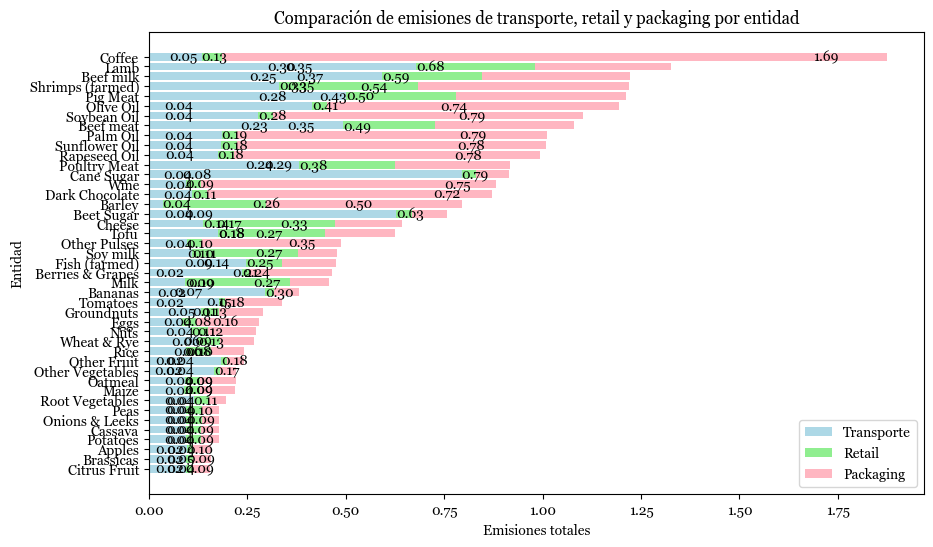

In [9]:
fod['Total_Food_Emissions_Transports'] = fod.iloc[:, 6:9].sum(axis=1)

df_filtered = fod[['Entity', 'food_emissions_transport', 'food_emissions_retail', 'food_emissions_packaging', 'Total_Food_Emissions_Transports']]

df_grouped = df_filtered.groupby('Entity').sum()
df_sorted = df_grouped.sort_values('Total_Food_Emissions_Transports', ascending=True)

# Crear la figura y los datos de las barras
fig, ax = plt.subplots(figsize=(10, 6))
entities = df_sorted.index
transport = df_sorted['food_emissions_transport']
retail = df_sorted['food_emissions_retail']
packaging = df_sorted['food_emissions_packaging']

# Crear las barras apiladas
bottom = None
bars = []
colors = ['lightblue', 'lightgreen', 'lightpink']
labels = ['Transporte', 'Retail', 'Packaging']

for i, data in enumerate([transport, retail, packaging]):
    bar = ax.barh(entities, data, color=colors[i], left=bottom)
    bars.append(bar)
    if bottom is None:
        bottom = data
    else:
        bottom += data

# Añadir etiquetas de valor a las barras
for bar in bars:
    for rect in bar:
        width = rect.get_width()
        if width > 0:
            ax.text(width, rect.get_y() + rect.get_height() / 2, '{:.2f}'.format(width),
                    ha='left', va='center', color='black', fontsize=10)

# Añadir leyenda
ax.legend(bars, labels, loc='lower right')

# Añadir título y etiquetas de los ejes
ax.set_title('Comparación de emisiones de transporte, retail y packaging por entidad')
ax.set_xlabel('Emisiones totales')
ax.set_ylabel('Entidad')

# Mostrar el gráfico
plt.show()



In [10]:
fod['Total_Food_Emissions_Transports'] = fod.iloc[:, 6:9].sum(axis=1)

df_filtered = fod[['Entity', 'food_emissions_transport', 'food_emissions_retail', 'food_emissions_packaging', 'Total_Food_Emissions_Transports']]

df_grouped = df_filtered.groupby('Entity').sum()
df_sorted = df_grouped.sort_values('Total_Food_Emissions_Transports', ascending=False)

entities = df_sorted.index
transport = df_sorted['food_emissions_transport']
retail = df_sorted['food_emissions_retail']
packaging = df_sorted['food_emissions_packaging']

# Crear las barras apiladas
fig = go.Figure()

fig.add_trace(go.Bar(y=entities, x=transport, name='Transporte', orientation='h'))
fig.add_trace(go.Bar(y=entities, x=retail, name='Retail', orientation='h'))
fig.add_trace(go.Bar(y=entities, x=packaging, name='Packaging', orientation='h'))

# Actualiza grafico 

def sort_entities(column_name):
    sorted_indices = df_grouped[column_name].sort_values(ascending=False).index
    return [entity for entity in entities if entity in sorted_indices]

# Diseño del gráfico
fig.update_layout(
    title='Comparación de emisiones de transporte, retail y packaging por entidad',
    xaxis_title='Emisiones totales',
    yaxis_title='Entidad',
    barmode='stack',
    bargap=0.2,
    legend=dict(
        x=1.05,
        y=0.5,
        bgcolor='rgba(255, 255, 255, 0.5)',
        itemclick='toggle',
        itemdoubleclick='toggleothers',
        traceorder='reversed'
    ),
)

# Mostrar el gráfico
fig.show()

In [11]:

# Ordenar el dataframe por la suma de las columnas 'food_emissions_land_use' y 'food_emissions_farm'
df_sorted = fod.sort_values(['food_emissions_land_use', 'food_emissions_farm'], ascending=False)

# Obtener los valores de las columnas
entities = df_sorted['Entity']
land_use = df_sorted['food_emissions_land_use']
farm = df_sorted['food_emissions_farm']

# Crear las barras apiladas
fig = go.Figure()
fig.add_trace(go.Bar(y=entities, x=land_use, name='Land Use', orientation='h'))
fig.add_trace(go.Bar(y=entities, x=farm, name='Farm', orientation='h'))

# Actualizar el diseño del gráfico
fig.update_layout(
    title='Comparación de emisiones de Land Use y Farm por entidad',
    xaxis_title='Emisiones totales',
    yaxis_title='Entidad',
    barmode='stack',
    bargap=0.2,
    legend=dict(
        x=1.05,
        y=0.5,
        bgcolor='rgba(255, 255, 255, 0.5)',
        itemclick='toggle',
        itemdoubleclick='toggleothers',
    ),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
)

# Definir la paleta de colores
colors = ['rgb(239, 154, 154)', 'rgb(144, 202, 249)']

# Asignar colores a las barras
for i, bar in enumerate(fig['data']):
    bar['marker']['color'] = colors[i % len(colors)]

# Crear leyenda con el nombre de las entidades
legend_text = [str(entity) for entity in entities]

for i, entity in enumerate(entities):
    fig.update_traces(name=str(entity), selector=dict(name=legend_text[i]))

# Mostrar el gráfico
fig.show()




In [12]:
todos = soy['Entity'].value_counts().index.to_list()
paises = filtrar_paises(todos)
# paises

['Liberia',
 'Mexico',
 'Pakistan',
 "Korea, Democratic People's Republic of",
 'Nigeria',
 'Nepal',
 'Myanmar',
 'Malaysia',
 'Peru',
 'Japan',
 'Italy',
 'Iran, Islamic Republic of',
 'Indonesia',
 'Paraguay',
 'Philippines',
 'Timor-Leste',
 'Viet Nam',
 'Uruguay',
 'United States',
 'Uganda',
 'Turkey',
 'Thailand',
 'Romania',
 'Tanzania, United Republic of',
 'Taiwan, Province of China',
 'Suriname',
 'Sri Lanka',
 'Korea, Republic of',
 'South Africa',
 'India',
 'Zimbabwe',
 'Cambodia',
 'Colombia',
 'Argentina',
 'Australia',
 'China',
 'Brazil',
 'Canada',
 'Bulgaria',
 'Ecuador',
 'South Africa',
 'Hungary',
 'Rwanda',
 'Bolivia, Plurinational State of',
 'Chile',
 'El Salvador',
 'Spain',
 'Egypt',
 'Zambia',
 'France',
 'Iraq',
 'Nicaragua',
 'Madagascar',
 'New Zealand',
 'Cameroon',
 'Albania',
 'Mali',
 'Guatemala',
 'Morocco',
 'Burkina Faso',
 'Costa Rica',
 'Guyana',
 'Gabon',
 'Benin',
 'Venezuela, Bolivarian Republic of',
 'Jordan',
 'Greece',
 'Switzerland',
 'Bel

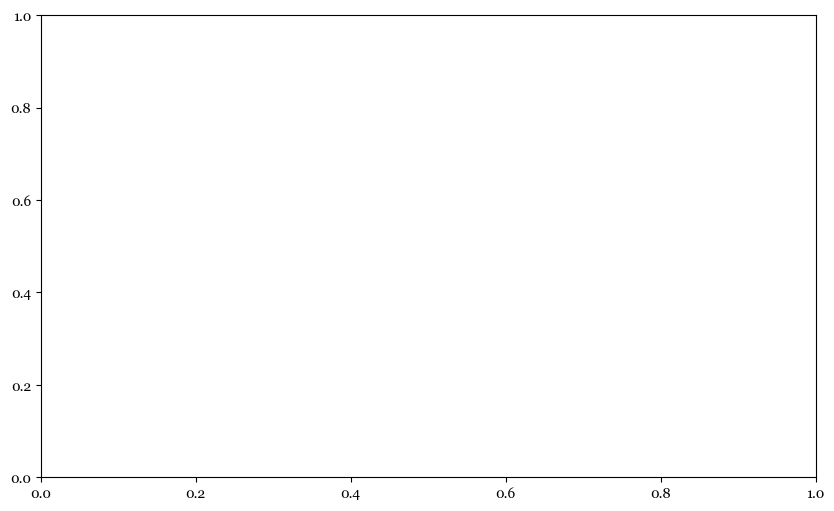

In [13]:
# Filtrar el DataFrame para incluir solo los países de la lista 'paises'
df_filtered = soy[soy['Entity'].isin(paises)]

# Agrupar los datos por país y año, y calcular la suma del área cosechada en hectáreas
grouped = df_filtered.groupby(['Entity', 'Year'])['Area harvested'].sum().reset_index()

# Ordenar los países por el área cosechada total en orden descendente
top_countries = grouped.groupby('Entity')['Area harvested'].sum().nlargest(5).index

# Filtrar los datos para incluir solo los cinco países con mayor área cosechada
df_top_countries = grouped[grouped['Entity'].isin(top_countries)]

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Función para actualizar el gráfico en cada frame de la animación
def update(frame):
    ax.clear()
    year_data = df_top_countries[df_top_countries['Year'] == frame]
    
    # Crear un gráfico de línea para cada país seleccionado en el año actual
    for country in top_countries:
        country_data = year_data[year_data['Entity'] == country]
        ax.plot(country_data['Year'], country_data['Area harvested'], label=country)
    
    ax.set_xlabel('Año')
    ax.set_ylabel('Área cosechada (hectáreas)')
    ax.set_title('Evolución del área cosechada por país - Año {}'.format(frame))
    ax.legend()

# Obtener los años únicos en el DataFrame
years = df_top_countries['Year'].unique()

# Crear la animación
animation = FuncAnimation(fig, update, frames=years, interval=1000)

# Mostrar la animación
plt.show()

In [82]:
# Filtrar el DataFrame para incluir solo los países de la lista 'paises'
df_filtered = soy[soy['Entity'].isin(paises)]

# Agrupar los datos por país y año, y calcular la suma del área cosechada en hectáreas
grouped = df_filtered.groupby(['Entity', 'Year'])['Area harvested'].sum().reset_index()

# Ordenar los países por el área cosechada total en orden descendente
top_countries = grouped.groupby('Entity')['Area harvested'].sum().nlargest(5).index

# Filtrar los datos para incluir solo los cinco países con mayor área cosechada
df_top_countries = grouped[grouped['Entity'].isin(top_countries)]

df_top_countries.to_csv('../data/Soy/prueba1.csv')

# Crear el gráfico interactivo utilizando Plotly Express
fig = px.line(df_top_countries, x='Year', y='Area harvested', color='Entity',
              labels={'Year': 'Año', 'Area harvested': 'Área cosechada (hectáreas)'},
              title='Evolución del área cosechada por país')

# Configurar la animación para que se mueva automáticamente por años
fig.update_layout(
    xaxis=dict(range=[df_top_countries['Year'].min(), df_top_countries['Year'].max()], autorange=False),
    updatemenus=[
        dict(
            type='buttons',
            buttons=[
                dict(label='Reproducir',
                     method='animate',
                     args=[None, {'frame': {'duration': 1000, 'redraw': True}, 'fromcurrent': True, 'transition': {'duration': 500}}]),
                dict(label='Pausa',
                     method='animate',
                     args=[[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate', 'transition': {'duration': 0}}])
            ],
            active=0,
            showactive=True,
            x=0.05,
            y=0,
            xanchor='right',
            yanchor='bottom'
        )
    ]
)

# Configurar los fotogramas de la animación
frames = []
for year in df_top_countries['Year'].unique():
    frame_data = df_top_countries[df_top_countries['Year'] == year]
    frame = go.Frame(
        data=[go.Scatter(x=frame_data['Year'], y=frame_data['Area harvested'], mode='lines', name=country)
              for country in top_countries],
        name=str(year)
    )
    frames.append(frame)

fig.frames = frames

# Mostrar el gráfico interactivo
fig.show()

In [45]:
soy.loc[soy['Entity'] == 'Brazil', soy['Area harvested'].max()]

KeyError: 127057168.0

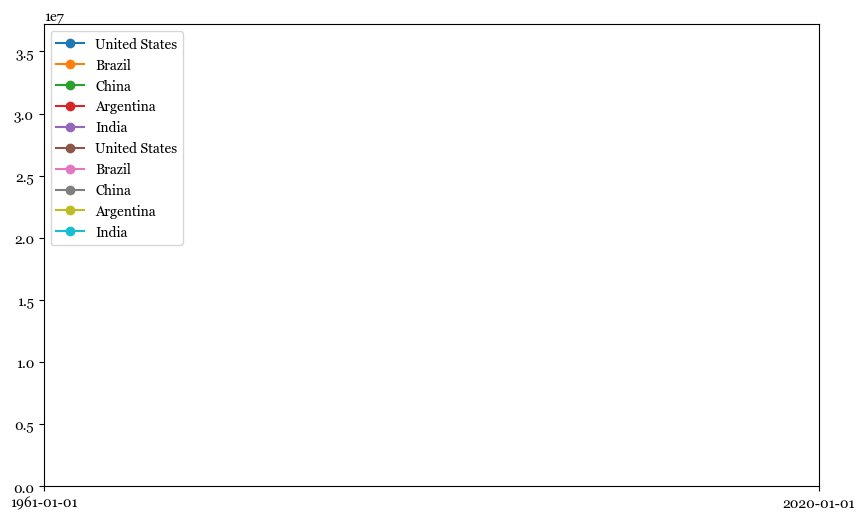

In [15]:
# Filtrar el DataFrame para incluir solo los países de la lista 'paises'
df_filtered = soy[soy['Entity'].isin(paises)]

# Agrupar los datos por país y año, y calcular la suma del área cosechada en hectáreas
grouped = df_filtered.groupby(['Entity', 'Year'])['Area harvested'].sum().reset_index()

# Obtener los 5 países con el mayor área cosechada
top_countries = grouped.groupby('Entity')['Area harvested'].sum().nlargest(5).index

# Filtrar los datos para incluir solo los cinco países con mayor área cosechada
df_top_countries = grouped[grouped['Entity'].isin(top_countries)]

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 6))

# Configurar el eje y los límites
ax.set_xlim(df_top_countries['Year'].min(), df_top_countries['Year'].max())
ax.set_ylim(0, df_top_countries['Area harvested'].max())

# Inicializar una lista vacía para almacenar las líneas de cada país
lines = []

# Definir una función para inicializar el gráfico
def init():
    for country in top_countries:
        line, = ax.plot([], [], marker='o', label=country)
        lines.append(line)
    ax.legend(loc='upper left')
    return lines

# Definir una función para actualizar el gráfico en cada fotograma de la animación
def update(frame):
    ax.clear()
    ax.set_xlim(df_top_countries['Year'].min(), df_top_countries['Year'].max())
    ax.set_ylim(0, df_top_countries['Area harvested'].max())
    ax.set_title(f'Año {frame}')
    ax.set_xlabel('Año')
    ax.set_ylabel('Área cosechada (hectáreas)')
    
    data = df_top_countries[df_top_countries['Year'] == frame]
    for i, country in enumerate(top_countries):
        country_data = data[data['Entity'] == country]
        lines[i], = ax.plot(country_data['Year'], country_data['Area harvested'], marker='o', label=country)
    
    ax.legend(loc='upper left')
    return lines

# Crear la animación
ani = FuncAnimation(fig, update, frames=df_top_countries['Year'].unique(), init_func=init, blit=True)

# Guardar la animación como un archivo de video (requiere FFMpeg instalado)
# ani.save('evolucion_area_cosechada.mp4', writer='ffmpeg')

# Mostrar el gráfico (opcional)
plt.show()

In [22]:
soy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5469 entries, 0 to 5468
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Entity          5469 non-null   object        
 1   Code            5469 non-null   int64         
 2   Year            5469 non-null   datetime64[ns]
 3   Food            5369 non-null   float64       
 4   Feed            3090 non-null   float64       
 5   Processed       4404 non-null   float64       
 6   Production      5467 non-null   float64       
 7   Yield           5094 non-null   float64       
 8   Area harvested  5463 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 384.7+ KB


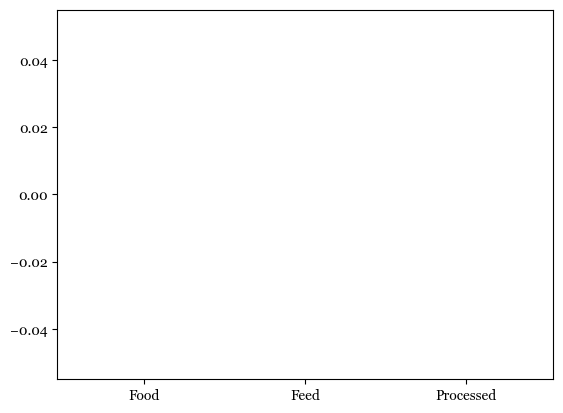

In [25]:
df = soy[soy['Year'].dt.year >= 2000]

totals = df[['Food', 'Feed', 'Processed']].sum()

# Crear la figura y el eje
fig, ax = plt.subplots()

# Configurar los datos y las etiquetas del eje x
x_labels = ['Food', 'Feed', 'Processed']
x = np.arange(len(x_labels))

# Crear las barras verticales
bars = ax.bar(x, np.zeros(len(x)))

# Función para animar el crecimiento de las barras
# def animate(i):
#     total_heights = totals * i / 100
#     for j, bar in enumerate(bars):
#         bar.set_height(total_heights[j])
#         ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
#                 f'{total_heights[j]:.2f}', ha='center', va='bottom')
#     ax.set_title(f'Progress: {i}%')

# Crear la animación

# anim = FuncAnimation(fig, animate, frames=100, interval=50, repeat=False)

# Configurar el eje y los límites
# ax.set_ylim(0, totals.max() * 1.1)

# Configurar las etiquetas del eje x
ax.set_xticks(x)
ax.set_xticklabels(x_labels)

# Mostrar el gráfico
plt.show()

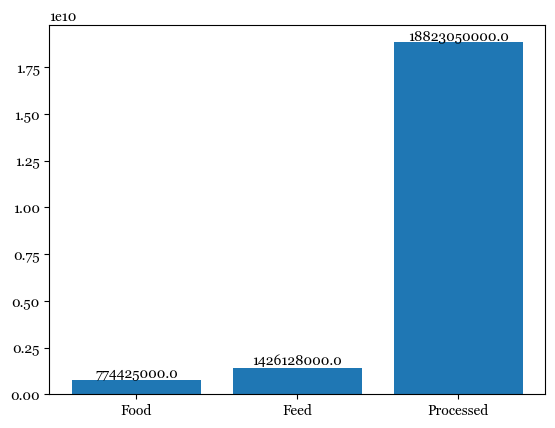

In [27]:
df = soy[soy['Year'].dt.year >= 2000]

# Calcular la suma total de las columnas "Food", "Feed" y "Processed"
totals = df[['Food', 'Feed', 'Processed']].sum()

# Crear la figura y el eje
fig, ax = plt.subplots()

# Configurar los datos y las etiquetas del eje x
x_labels = ['Food', 'Feed', 'Processed']
x = range(len(x_labels))

# Crear las barras verticales
bars = ax.bar(x, totals)

# Agregar etiquetas a las barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height,
            f'{height}', ha='center', va='bottom')

# Configurar las etiquetas del eje x
ax.set_xticks(x)
ax.set_xticklabels(x_labels)

# Mostrar el gráfico
plt.show()

In [28]:
fod.head(1)

,Entity,Code,food_emissions_land_use,food_emissions_farm,food_emissions_animal_feed,food_emissions_processing,food_emissions_transport,food_emissions_retail,food_emissions_packaging,food_emissions_losses,Water_l_kg
0,Apples,1,-0.028951,0.225816,0.0,0.00382,0.095804,0.016578,0.044526,0.070808,180.1


In [29]:
fod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Entity                      43 non-null     object 
 1   Code                        43 non-null     int64  
 2   food_emissions_land_use     43 non-null     float64
 3   food_emissions_farm         43 non-null     float64
 4   food_emissions_animal_feed  43 non-null     float64
 5   food_emissions_processing   43 non-null     float64
 6   food_emissions_transport    43 non-null     float64
 7   food_emissions_retail       43 non-null     float64
 8   food_emissions_packaging    43 non-null     float64
 9   food_emissions_losses       43 non-null     float64
 10  Water_l_kg                  38 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 3.8+ KB


In [93]:
soy_milk_emissions = fod[fod['Entity'] == 'Soy milk']
# Total emisions of 200g by day
total_emissions = soy_milk_emissions[['food_emissions_land_use', 'food_emissions_farm', 'food_emissions_animal_feed',
                                    'food_emissions_processing', 'food_emissions_transport', 'food_emissions_retail',
                                    'food_emissions_packaging', 'food_emissions_losses']].sum().sum()
# Result
print(f"Over an entire year your consumption of soy milk is adding {math.ceil(total_emissions* 42)}kg greenhouse gas emissions.")
# GIF car

Over an entire year your consumption of soy milk is adding 41kg greenhouse gas emissions.


In [83]:
# Filtrar los datos para la entidad 'Tofu'
tofu_emissions = fod[fod['Entity'] == 'Tofu']

# Calcular el total de las emisiones para 150g
total_emissions = tofu_emissions[['food_emissions_land_use', 'food_emissions_farm', 'food_emissions_animal_feed',
                                      'food_emissions_processing', 'food_emissions_transport', 'food_emissions_retail',
                                      'food_emissions_packaging', 'food_emissions_losses']].sum().sum() * 0.15

# result
print("Total de emisiones de 'Tofu' (250g):", total_emissions)
total_emissions * 365

Total de emisiones de 'Tofu' (250g): 0.47426165415


173.10550376474998

In [48]:
# Filtrar los datos para la 'Soy milk'
soy_milk_emissions = fod[fod['Entity'] == 'Soy milk']

# Calcular el total de las emisiones de 200g
total_emissions = soy_milk_emissions[['food_emissions_land_use', 'food_emissions_farm', 'food_emissions_animal_feed',
                                      'food_emissions_processing', 'food_emissions_transport', 'food_emissions_retail',
                                      'food_emissions_packaging', 'food_emissions_losses']].sum().sum() * 0.2

# Result
print("Total emisions of Soy milk by year", total_emissions.round(2)* 365)
total_emissions * 365

Total de emisiones de 'Soy milk' (200g): 0.2


71.188078169

In [39]:
# Filtrar los datos para la 'Soy milk'
soy_milk_emissions = fod[fod['Entity'] == 'Soy milk']

# Gasto de agua de 200g
total_emissions = soy_milk_emissions[['Water_l_kg']].sum().sum() * 0.2

# Result
print("Total de litros de 'Soy milk' (200g):", total_emissions)
total_emissions * 365

Total de litros de 'Soy milk' (200g): 5.5600000000000005


2029.4

In [62]:
total_emissions = soy_milk_emissions[['food_emissions_land_use', 'food_emissions_farm', 'food_emissions_animal_feed',
                                    'food_emissions_processing', 'food_emissions_transport', 'food_emissions_retail',
                                    'food_emissions_packaging', 'food_emissions_losses']].sum().sum()
# Result
print(f"Over an entire year your consumption of tofu is adding {int(total_emissions.round(0))* 42}kg greenhouse gas emissions.")



Over an entire year your consumption of tofu is adding 42kg greenhouse gas emissions.


In [81]:
total_emissions = soy_milk_emissions[['food_emissions_land_use', 'food_emissions_farm', 'food_emissions_animal_feed',
                                                'food_emissions_processing', 'food_emissions_transport', 'food_emissions_retail',
                                                'food_emissions_packaging', 'food_emissions_losses']].sum().sum() * 0.15
# Result
print(f"Over an entire year your consumption of tofu is adding {math.ceil(total_emissions* 365)}kg greenhouse gas emissions.")
total_emissions*365

Over an entire year your consumption of tofu is adding 54kg greenhouse gas emissions.


53.39105862674999

In [41]:
# Filtrar los datos para la 'Beef milk'
soy_milk_emissions = fod[fod['Entity'] == 'Beef milk']

# Gasto de agua de 200g
total_emissions = soy_milk_emissions[['Water_l_kg']].sum().sum() * 0.2

# Result
print("Total de litros de 'Beef milk' (200g):", total_emissions)
total_emissions * 365

Total de litros de 'Beef milk' (200g): 542.86


198143.9

In [42]:
# Filtrar los datos para la 'Tofu'
soy_milk_emissions = fod[fod['Entity'] == 'Tofu']

# Gasto de agua de 200g
total_emissions = soy_milk_emissions[['Water_l_kg']].sum().sum() * 0.15

# Result
print("Total de litros de 'Tofu' (150g):", total_emissions)
total_emissions * 365

Total de litros de 'Tofu' (150g): 22.29


8135.849999999999

In [94]:
oil_prod.head()

,Entity,Code,Year,Sesame,Maize,Safflower,Coconut,Sunflower,Rapeseed,Palm kernel,Groundnut,Linseed,Olive,Palm,Soybean,Cottonseed
0,Afghanistan,132,2011,1292.0,NaN,NaN,NaN,60.0,NaN,NaN,NaN,674.65,538.56,NaN,NaN,3725.0
1,Afghanistan,132,2012,1261.0,NaN,NaN,NaN,61.0,NaN,NaN,NaN,706.3,538.56,NaN,NaN,4097.97
2,Afghanistan,132,2013,1334.0,NaN,NaN,NaN,138.0,NaN,NaN,NaN,733.57,545.93,NaN,NaN,4761.86
3,Afghanistan,132,2014,1250.0,NaN,NaN,NaN,960.0,NaN,NaN,NaN,790.0,658.42,NaN,NaN,4832.28
4,Afghanistan,132,2015,861.0,NaN,NaN,NaN,1035.0,NaN,NaN,NaN,5374.63,711.37,NaN,NaN,5690.84


In [96]:
oil_yield.head()

,Entity,Code,Year,Coconut,Groundnut,Palm,Sesame,Sunflower,Cottonseed,Olive,Rapeseed,Soybean
0,Afghanistan,132,1962,NaN,NaN,NaN,0.056506023,0.37804216,0.0847372,0.1496,NaN,NaN
1,Afghanistan,132,1963,NaN,NaN,NaN,0.05514458,0.37804216,0.09671282,0.13599999,NaN,NaN
2,Afghanistan,132,1964,NaN,NaN,NaN,0.081999995,0.37804216,0.065566845,0.1496,NaN,NaN
3,Afghanistan,132,1965,NaN,NaN,NaN,0.08496386,0.39009038,0.09793153,0.13599999,NaN,NaN
4,Afghanistan,132,1966,NaN,NaN,NaN,0.09484337,0.41418675,0.134445,0.1496,NaN,NaN


In [97]:
fod

,Entity,Code,Animal_origin,food_emissions_land_use,food_emissions_farm,food_emissions_animal_feed,food_emissions_processing,food_emissions_transport,food_emissions_retail,food_emissions_packaging,food_emissions_losses,Water_l_kg,Total_Food_Emissions
0,Apples,1,False,-0.028951,0.225816,0.000000,0.003820,0.095804,0.016578,0.044526,0.070808,180.1,0.313067
1,Bananas,2,False,-0.025534,0.269618,0.000000,0.060146,0.295830,0.020981,0.065670,0.175185,114.5,0.621041
2,Barley,3,False,0.008676,0.176377,0.000000,0.127703,0.035351,0.263587,0.496786,0.070692,17.1,0.611693
3,Beef meat,4,True,23.237536,56.228063,2.680979,1.811083,0.494125,0.233538,0.352084,14.439998,1451.2,85.685323
4,Beef milk,5,True,1.266022,21.915529,3.503673,1.547664,0.592410,0.254032,0.374549,3.847515,2714.3,30.079332
5,Beet Sugar,6,False,0.000052,0.535721,0.000000,0.241885,0.628544,0.039322,0.090289,0.276263,217.7,1.445525
6,Berries & Grapes,7,False,0.024601,0.717848,0.000000,0.000000,0.236392,0.017057,0.211092,0.324895,419.6,0.995898
7,Brassicas,8,False,0.002242,0.277745,0.000000,0.000000,0.094641,0.016844,0.045303,0.077781,119.4,0.391472
8,Cane Sugar,9,False,1.263041,0.491270,0.000000,0.037381,0.794510,0.036723,0.084277,0.491722,620.1,2.622925
9,Cassava,10,False,0.589436,0.219994,0.000000,0.000000,0.093597,0.039322,0.044822,0.328504,0.0,0.942349


In [102]:
oil_prod.loc[oil_prod['Entity'] == 'Brazil', ['Entity', 'Sesame',	'Maize',	'Safflower',	'Coconut',	'Sunflower',	'Rapeseed',	'Palm', 	'Groundnut',	'Linseed',	'Olive',	'Soybean',	'Cottonseed']]

,Entity,Sesame,Maize,Safflower,Coconut,Sunflower,Rapeseed,Palm,Groundnut,Linseed,Olive,Soybean,Cottonseed
1010,Brazil,NaN,31552.5,NaN,1071.0,NaN,NaN,3993.0,91808.0,8456.0,NaN,NaN,116230.0
1011,Brazil,NaN,33582.5,NaN,637.0,NaN,NaN,5126.0,90349.0,6808.0,NaN,NaN,133503.0
1012,Brazil,NaN,24237.5,NaN,389.0,NaN,NaN,5340.0,78034.0,8962.0,NaN,NaN,130825.0
1013,Brazil,NaN,26915.0,NaN,552.0,NaN,NaN,6429.0,41551.0,4039.0,NaN,NaN,118434.0
1014,Brazil,NaN,32602.5,NaN,707.0,NaN,NaN,8491.0,102885.0,8214.0,NaN,NaN,103169.0
1015,Brazil,NaN,31325.0,NaN,881.0,NaN,NaN,10980.0,122276.0,5507.0,NaN,NaN,130568.0
1016,Brazil,NaN,32060.0,NaN,1201.0,NaN,NaN,9795.0,112204.0,6931.0,NaN,NaN,112086.0
1017,Brazil,NaN,33390.0,NaN,796.0,NaN,NaN,10191.0,68786.0,2956.0,NaN,NaN,137415.0
1018,Brazil,NaN,36277.5,NaN,779.0,NaN,NaN,11619.0,89682.0,4002.0,NaN,NaN,177117.0
1019,Brazil,NaN,33652.5,NaN,1040.0,NaN,NaN,4678.0,131308.0,7588.0,NaN,NaN,146574.0
